# Import libraries 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest


In [2]:
#imort the dataset
df = pd.read_csv('Sales Dataset.csv')

# 1.0 Explanetory Data Analysis 

In [3]:
#Show the dataset
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107,176,292.0,116,69,38,962,110,110,160,270,2,04/01/2010 00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75,135,225.0,90,60,29,1148,90,80,130,210,2,07/01/2010 00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122,195,325.0,130,73,42,1134,130,110,180,290,2,11/01/2010 00:00,Coffee,Columbian,Regular
3,203,NaN,East,Small Market,105,174,289.0,115,69,37,1166,110,100,160,260,2,12/01/2010 00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104,135,223.0,90,56,29,1148,90,80,130,210,2,07/01/2011 00:00,Coffee,Columbian,Regular


# 1.1 Data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4246 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4246 non-null   object 
 4   Profit          4248 non-null   int64  
 5   Margin          4248 non-null   int64  
 6   Sales           4244 non-null   float64
 7   COGS            4248 non-null   int64  
 8   Total Expenses  4248 non-null   int64  
 9   Marketing       4248 non-null   int64  
 10  Inventory       4248 non-null   int64  
 11  Budget Profit   4248 non-null   int64  
 12  Budget COGS     4248 non-null   int64  
 13  Budget Margin   4248 non-null   int64  
 14  Budget Sales    4248 non-null   int64  
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [5]:
#Checking the unique number in every column
df.nunique()

Area Code         156
State              20
Market              4
Market Size         2
Profit            466
Margin            290
Sales             432
COGS              173
Total Expenses    156
Marketing         102
Inventory         610
Budget Profit      76
Budget COGS        41
Budget Margin      76
Budget Sales       89
ProductId          13
Date               24
Product Type        4
Product            13
Type                2
dtype: int64

In [6]:
#Column name Lower
df.columns= df.columns.str.lower()

#  1.2 Missing Value Handiling

In [7]:
df.isnull().sum()

area code         0
state             2
market            0
market size       2
profit            0
margin            0
sales             4
cogs              0
total expenses    0
marketing         0
inventory         0
budget profit     0
budget cogs       0
budget margin     0
budget sales      0
productid         0
date              0
product type      0
product           1
type              2
dtype: int64

In [8]:
#state fill up by the area code.
df['state']= df.groupby('area code')['state'].transform( lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)
# Market size  fill up by the market.
df['market size']= df.groupby('market')['market size'].transform( lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)
#sales fill up by the Median number
df['sales'] = df['sales'].median()
# product   fill up by the productid.
df['product']= df.groupby('productid')['product'].transform( lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)
# Type fill up by the productid 
df['type']= df.groupby('productid')['type'].transform( lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)


In [9]:
df.isnull().sum()

area code         0
state             0
market            0
market size       0
profit            0
margin            0
sales             0
cogs              0
total expenses    0
marketing         0
inventory         0
budget profit     0
budget cogs       0
budget margin     0
budget sales      0
productid         0
date              0
product type      0
product           0
type              0
dtype: int64

In [10]:
#summary Statistics
df.describe()

,area code,profit,margin,sales,cogs,total expenses,marketing,inventory,budget profit,budget cogs,budget margin,budget sales,productid
count,4248.000000,4248.000000,4248.000000,4248.0,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,138.0,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,0.0,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,138.0,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,138.0,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.0,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,138.0,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,138.0,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


# 1.3 Sales Distribution


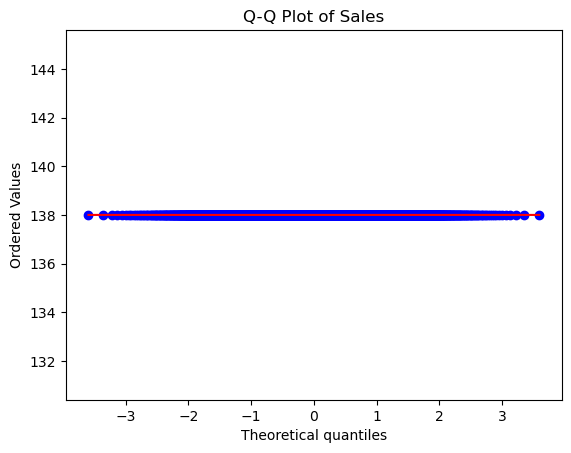

In [11]:
stats.probplot(df['sales'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Sales")
plt.show()

In [12]:
# Made another copy of dataset
df2= df.copy()
df3 = df.copy()

# 1.4 Categorical variable Encoding

In [13]:
le = LabelEncoder()                #For label encoding
df2['state'] = le.fit_transform(df2['state'])
df2['market'] = le.fit_transform(df2['market'])
df2['market size'] = le.fit_transform(df2['market size'])
df2['product type'] = le.fit_transform(df2['product type'])
df2['product'] = le.fit_transform(df2['product'])
df2['type'] = le.fit_transform(df2['type'])
df2['date'] = le.fit_transform(df2['date'])
df2['sales'] = df2['sales'].astype('int64')


# Q(2.0) Can we predict Profit based on product, market, and budget features?

In [14]:
#Select your features and target
features = ['product type', 'market', 'market size', 
            'budget profit', 'budget sales', 'budget margin', 'budget cogs']
target = 'profit'
df_model = df[features + [target]].copy()

# Convert categorical columns to dummy variables
df_model = pd.get_dummies(df_model, columns=['product type', 'market', 'market size'], drop_first=True)

# Drop or fill missing values
df_model = df_model.dropna()


In [16]:
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1013.5485186274268
R² Score: 0.9086026550789545


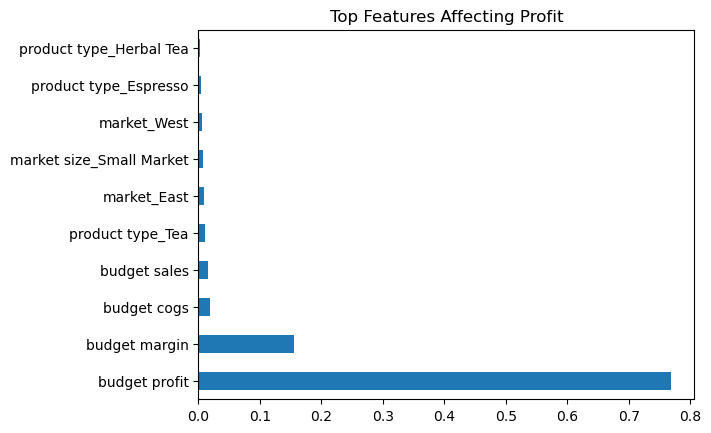

In [18]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top Features Affecting Profit")
plt.show()

# Q(2.2) Which features most affect the Profit Margin?

In [19]:
target = 'margin'

features = ['product type', 'market', 'market size', 'sales',
            'cogs', 'total expenses', 'marketing', 'inventory',
            'budget profit', 'budget sales', 'budget margin', 'budget cogs']
df_model = df[features + [target]].copy()

# Convert categorical to dummy variables
df_model = pd.get_dummies(df_model, columns=['product type', 'market', 'market size'], drop_first=True)
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

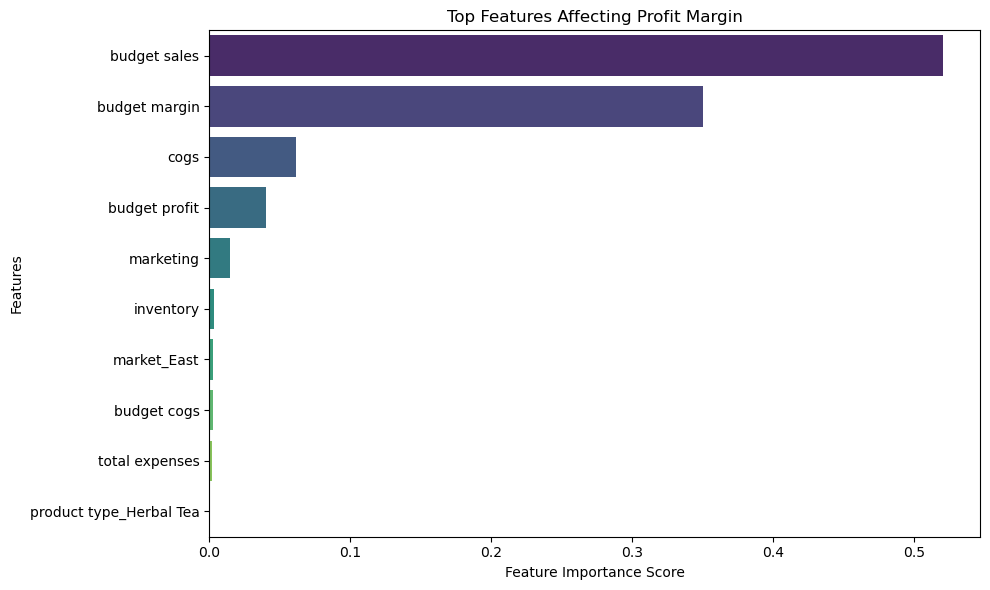

In [20]:
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top Features Affecting Profit Margin')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Q(2.3)  Can we classify products as “High Profit” vs “Low Profit”?

In [21]:
#Use median to define 'High' vs 'Low'
threshold = df['profit'].median()
#Create binary label as 1= High profit , 0 = Low Profit
df['profit_label']= (df['profit']>=threshold).astype(int)
features = ['product type', 'market', 'market size', 'sales',
            'cogs', 'total expenses', 'marketing', 'inventory',
            'budget profit', 'budget sales', 'budget margin', 'budget cogs']
target = 'profit_label'
# Prepare the dataset
df_model = df[features + [target]].copy()
# Convert categorical to numeric (One-Hot Encoding)
df_model = pd.get_dummies(df_model, columns=['product type', 'market', 'market size'], drop_first=True)
X = df_model.drop(columns=[target])
y = df_model[target]
#Classifier train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#Evaluate the model
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[368  60]
 [ 53 369]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       428
           1       0.86      0.87      0.87       422

    accuracy                           0.87       850
   macro avg       0.87      0.87      0.87       850
weighted avg       0.87      0.87      0.87       850



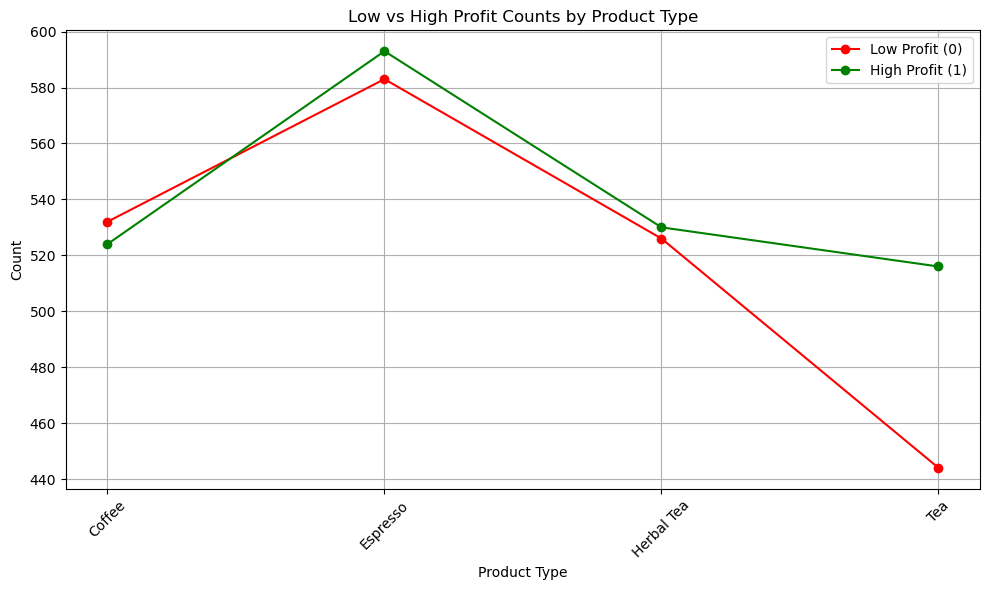

In [22]:
# Group by product type and profit_label
profit_counts = df.groupby(['product type', 'profit_label']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(profit_counts.index, profit_counts[0], marker='o', label='Low Profit (0)', color='red')
plt.plot(profit_counts.index, profit_counts[1], marker='o', label='High Profit (1)', color='green')
plt.title('Low vs High Profit Counts by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Q(2.4) Which Market or Region has the highest potential for profit growth?

In [25]:
h=df.groupby(['market'])['profit'].sum().reset_index()
print(h)

    market  profit
0  Central   93852
1     East   59217
2    South   32478
3     West   73996


# Q(2.5) How closely does actual COGS match the Budget COGS?

In [33]:
# Calculate difference and percentage error
df['difference'] = df['cogs'] - df['budget cogs']
df['percent_error'] = (df['difference'] / df['budget cogs']) * 100

# Summary statistics
mean_diff = df['difference'].mean()
mean_percent_error = df['percent_error'].mean()
correlation = df['cogs'].corr(df['budget cogs'])


📊 Comparison Summary:
Average Difference: 9.60
Average Percentage Error: inf%
Correlation between Actual and Budgeted COGS: 0.95


In [37]:
print("📊 Comparison Summary:")
print(f"Average Difference: {mean_diff:.2f}")
print("Average Percentage Error:",mean_percent_error)
print(f"Correlation between Actual and Budgeted COGS: {correlation:.2f}")

📊 Comparison Summary:
Average Difference: 9.60
Average Percentage Error: inf
Correlation between Actual and Budgeted COGS: 0.95


# Q(2.6) Can we predict if a product will exceed its budgeted sales?

In [38]:
df['exceeds_budget'] = (df['sales'] > df['budget sales']).astype(int)
features = ['budget sales', 'budget margin', 'market size', 'product type', 'marketing']
df = df.dropna(subset=features)

# Convert categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

X = df_encoded
y = df['exceeds_budget']

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       697

    accuracy                           1.00      1275
   macro avg       1.00      1.00      1.00      1275
weighted avg       1.00      1.00      1.00      1275



# Q(2.7)  Which months or regions show seasonal sales patterns?

In [41]:
top_products = df.groupby(['market', 'product type'])['sales'].sum().reset_index().sort_values(['sales'],ascending=False)
print(top_products)

     market product type    sales
0   Central       Coffee  52992.0
12     West     Espresso  49680.0
14     West          Tea  49680.0
2   Central   Herbal Tea  46368.0
3   Central          Tea  46368.0
11     West       Coffee  43056.0
13     West   Herbal Tea  43056.0
1   Central     Espresso  39744.0
9     South     Espresso  39744.0
7      East          Tea  36432.0
5      East     Espresso  33120.0
6      East   Herbal Tea  29808.0
8     South       Coffee  26496.0
10    South   Herbal Tea  26496.0
4      East       Coffee  23184.0


# Q(2.8) Can we detect anomalies where marketing expenses do not align with profit or sales

In [50]:

# Features to use
features = df[['marketing', 'profit', 'sales']].dropna()

# Fit model
model = IsolationForest(contamination=0.05, random_state=42)
features['anomaly'] = model.fit_predict(features)

# -1 means anomaly
anomalies_ml = features[features['anomaly'] == -1]

print("Detected Anomalies:")
print(anomalies_ml)


C:\Users\anjum\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Detected Anomalies:
            marketing  profit  sales  anomaly
date                                         
2010-01-01         95    -172  138.0       -1
2010-01-01         23     367  138.0       -1
2010-01-01         93    -354  138.0       -1
2010-02-01         91    -342  138.0       -1
2010-02-01         66    -120  138.0       -1
...               ...     ...    ...      ...
2011-12-01         97     402  138.0       -1
2011-12-01        122    -332  138.0       -1
2011-12-01        111     321  138.0       -1
2011-12-01         97     402  138.0       -1
2011-12-01        111    -605  138.0       -1

[213 rows x 4 columns]
